In [36]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [203]:
# hudson_ibd_file = os.path.expanduser('/Users/dnelson/project/WF_coalescent/results/hudson_ibd.ibd.gz')
hudson_ibd_file = os.path.expanduser('/Users/dnelson/project/WF_coalescent/results/hudson_200_proper_recomb_ibd.ibd.gz')
WF_ibd_file = os.path.expanduser('/Users/dnelson/project/WF_coalescent/results/WF_200_proper_recomb_ibd.ibd.gz')

In [204]:
columns = ['ind1', 'copy1', 'ind2', 'copy2', 'chrom', 'start', 'end', 'lod']
WF_df = pd.DataFrame.from_csv(WF_ibd_file, sep='\t', header=None, index_col=None)
hudson_df = pd.DataFrame.from_csv(hudson_ibd_file, sep='\t', header=None, index_col=None)
WF_df.columns = columns
hudson_df.columns = columns

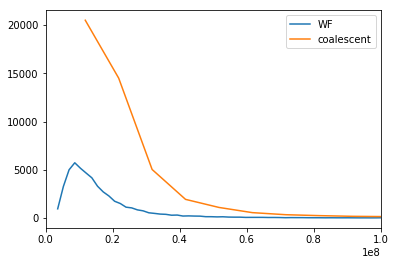

In [205]:
for df in [WF_df, hudson_df]:
    df['len'] = df['end'] - df['start']


counts, edges = np.histogram(WF_df['len'].values, bins=100)
plt.plot(edges[1:], counts, label='WF')
counts, edges = np.histogram(hudson_df['len'].values, bins=100)
plt.plot(edges[1:], counts, label='coalescent')
plt.legend()
plt.xlim(0, 1e8)
plt.show()

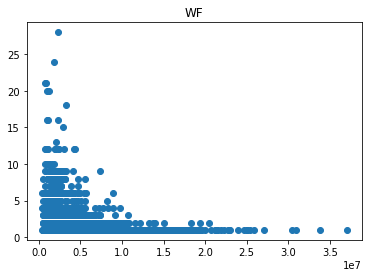

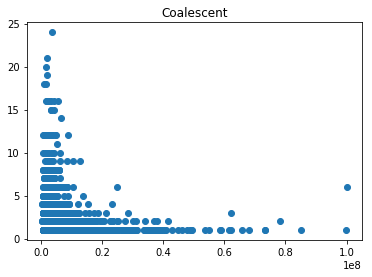

In [88]:
for label, df in [('WF', WF_df), ('Coalescent', hudson_df)]:
    counts = Counter(df['len'].values)

    ibd_counts = [(k, v) for k, v in counts.items()]

    ibd_len, ibd_count = zip(*ibd_counts)

    plt.plot(ibd_len, ibd_count, 'o')
    plt.title(label)
    plt.show()

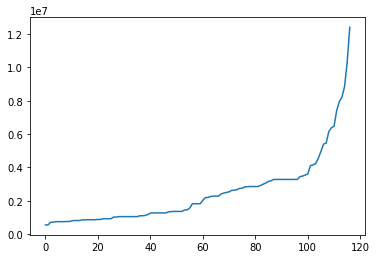

In [109]:
plt.plot(sorted(WF_df[WF_df['ind1'] == 'msp_4']['len'].values))
plt.show()

In [131]:
WF_df['count'] = 1
WF_df[WF_df['ind1'] == 'msp_4'].groupby('ind2').sum()

,copy1,copy2,chrom,start,end,lod,len,count
ind2,,,,,,,,
msp_11,5,3,3,284690522,293638494,19.74,8947972,3
msp_16,3,4,2,11642858,18207870,6.92,6565012,2
msp_22,7,10,5,353318007,359245736,20.54,5927729,5
msp_28,23,28,14,738371865,753408588,75.42,15036723,14
msp_29,3,2,2,74093860,79808150,6.10,5714290,2
msp_30,3,2,2,11642858,18207870,6.92,6565012,2
msp_33,19,22,12,602048684,619631510,72.89,17582826,12
msp_38,6,8,4,261566606,265413596,12.82,3846990,4
msp_44,3,4,2,11642858,18207870,6.88,6565012,2


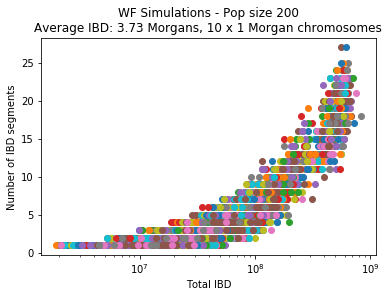

In [221]:
WF_df['count'] = 1
for ind in set(WF_df['ind1'].values):
    ind_df = WF_df[WF_df['ind1'] == ind]
    df1 = ind_df[ind_df['copy1'] == 1].groupby('ind2').sum()
    df2 = ind_df[ind_df['copy1'] == 2].groupby('ind2').sum()

    ## This doesn't cut num segments in half - why not?
    for df in [df1, df2]:
        total_IBD = df['len'].values
        num_segments = df['count'].values

        plt.plot(total_IBD, num_segments, 'o')

IBD_per_ind = np.round(np.sum(WF_df['len'].values) / 2e11, 2)

plt.title('WF Simulations - Pop size 200\nAverage IBD: ' + str(IBD_per_ind) + ' Morgans, 10 x 1 Morgan chromosomes')
plt.ylabel('Number of IBD segments')
plt.xlabel('Total IBD')
plt.xscale('log')
plt.savefig('/Users/dnelson/project/WF_coalescent/results/WF_200_proper_recomb_plot.png')

plt.show()

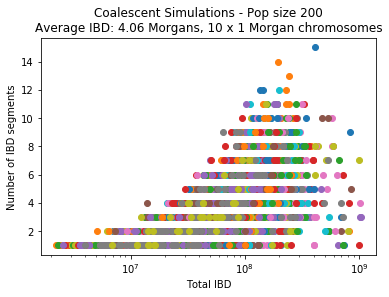

In [220]:
hudson_df['count'] = 1
for ind in set(hudson_df['ind1'].values):
    df = hudson_df[hudson_df['ind1'] == ind].groupby('ind2').sum()
#     df = df[df['lod'] > 500]

    ## TODO: Need to further split this by ind with whom IBD is shared
    ## Ahh it's number of segments vs TOTAL IBD shared!
    total_IBD = df['len'].values
    num_segments = df['count'].values

    plt.plot(total_IBD, num_segments, 'o')

IBD_per_ind = np.round(np.sum(hudson_df['len'].values) / 2e11, 2)

plt.title('Coalescent Simulations - Pop size 200\nAverage IBD: ' + str(IBD_per_ind) + ' Morgans, 10 x 1 Morgan chromosomes')
plt.ylabel('Number of IBD segments')
plt.xlabel('Total IBD')
plt.xscale('log')
plt.savefig('/Users/dnelson/project/WF_coalescent/results/coalescent_200_plot.png')

plt.show()

In [214]:
np.mean(WF_df['copy1'].values)

1.5027640204681367

In [218]:
df2

,copy1,copy2,chrom,start,end,lod,len,count
ind2,,,,,,,,
msp_160,12,6,6,3221493645,3344261780,59.26,122768135,6
msp_162,2,2,1,187130434,191581896,3.95,4451462,1
msp_163,4,4,2,1963169727,1994441200,14.48,31271473,2
msp_164,2,1,1,801775751,807736368,4.08,5960617,1
msp_169,6,6,3,2487269176,2533631053,17.80,46361877,3
msp_170,8,8,4,2759327984,2832423611,46.71,73095627,4
msp_171,2,1,1,104110784,117965960,3.18,13855176,1
msp_172,2,1,1,104110784,117965960,3.47,13855176,1
msp_180,8,5,4,1886680656,1922531328,19.01,35850672,4
